In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
sns.set_context(rc={"figure.figsize": (12, 8)})
pd.set_option("max_rows", 10)
np.set_printoptions(suppress=True)

There are a few topics that I wish were taught in an introduction to statistics undergraduate course. One of those topics is Bayesian Statistics, the other is Statistical Power. In this post, I go through the analysis of flipping coins, and how to calculate statistical power for determining if a coin is biased or fair.

When we flip a coin $n$ times with probability $p$ of getting heads, the probability distribution is binomial. We can apply hypothesis testing where the null hypothesis states: the coin is fair ( $p=0.5$ ), and the alternative hypothesis states: the coin is not fair, ( $p\neq0.5$ ). Additionally, we fix $\alpha=0.05$,  meaning when the null hypothesis is true, we will reject it 5% of the time (Type I error). We can find the confidence interval:

In [2]:
from scipy.stats import binom

alpha = 0.05
n = 100 # number of flips
p = 0.5 # fair
binom.interval(1 - alpha, 100, 0.5)

(40.0, 60.0)

For 100 coin flips, if we get a number of heads between 40 and 60, we "fail to reject the null hypothesis", otherwise we "reject the null hypothesis." With $\alpha=0.05$, we would incorrectly "reject the hypothesis" 5% of the time.

We may further ask, **what is the probability that we "reject the null hypothesis" when** $p\neq0.5$. Lets say that the coin has bias with $p=0.55$, the probability of not getting 40 to 60 heads is:

In [3]:
# cdf = cumulative distrubution function
1 - (binom.cdf(60, 100, 0.55) - binom.cdf(40, 100, 0.55))

0.13607421925534291

If $p=0.55$, then there is a 13.6% chance that we will "reject the null hypothesis". In other words, 13.6% of the time we would be able to distinguish between a fair coin from a biased one. This value is commonly known as statistical power. Lets write a function to calculate the statistical power for different values of $p$ and flips, $n$:

In [4]:
def coin_power(n, p, alpha=0.05):
    """Calculates statistical power
    Arguments:
    n -- number of flips
    p -- actual probability for heads
    """
    # confidence interval for p = 0.5 for n flips
    lower, upper = binom.interval(1 - alpha, n, 0.5)
    return 1 - (binom.cdf(upper, n, p) - binom.cdf(lower, n, p))

For 100 flips, we plot the statistical power as a function of the actual heads probability, $p$:

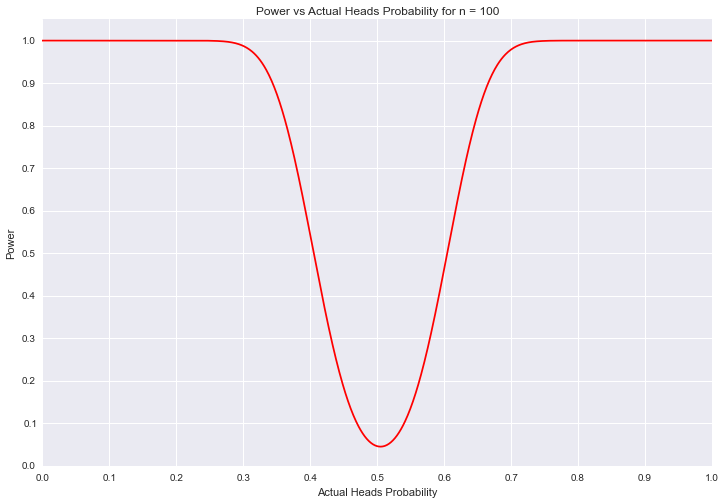

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)
ax.set_title("Power vs Actual Heads Probability for n = 100")

def plot_power(n, ax, **kwargs):
    """Plots power vs actual heads
    Arguments:
    n -- number of flips
    ax -- matplotlib axes
    kwargs -- keyword arguments for plotting
    """
    p_values = np.linspace(0,1,1000)
    ax.plot(p_values, coin_power(n, p_values), **kwargs)
    ax.set_xticks(np.arange(0,1.1, 0.1))
    ax.set_yticks(np.arange(0,1.1, 0.1))
    ax.set_ybound((0, 1.05))
    ax.set_ylabel("Power")
    ax.set_xlabel("Actual Heads Probability")
    
plot_power(100, ax, color='r')

For 100 flips, if the actual heads probability is 0.4, then the power is 0.5, which means we would not be able to tell the different between a bias coin and fair coin 50% of the time. One way to increase the power is to increase the number of flips, n: 

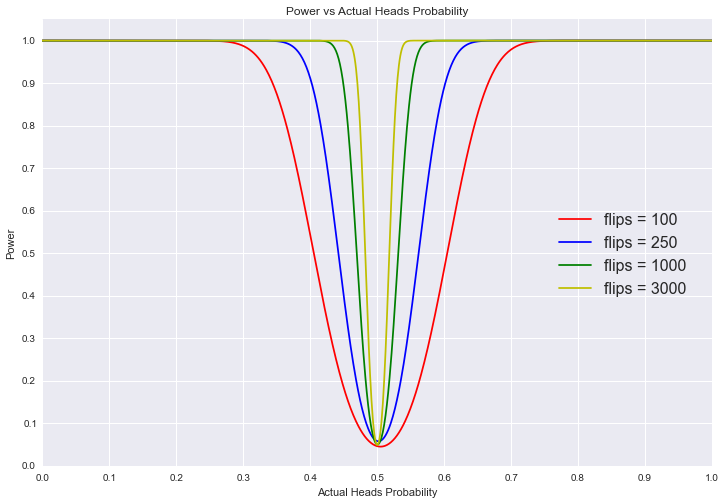

In [6]:
fig, ax = plt.subplots(1, 1)

def plot_powers(ax):
    ax.set_title("Power vs Actual Heads Probability")
    plot_power(100, ax, color='r', label="flips = 100")
    plot_power(250, ax, color='b', label="flips = 250")
    plot_power(1000, ax, color='g', label="flips = 1000")
    plot_power(3000, ax, color='y', label="flips = 3000")
    ax.legend(bbox_to_anchor=(0.75, 0.6), loc=2, prop={'size':16})
    
plot_powers(ax)

As we increase the number of flips, the power is greater for broader values of $p$. Lets focus on the region of power greater than 0.9:

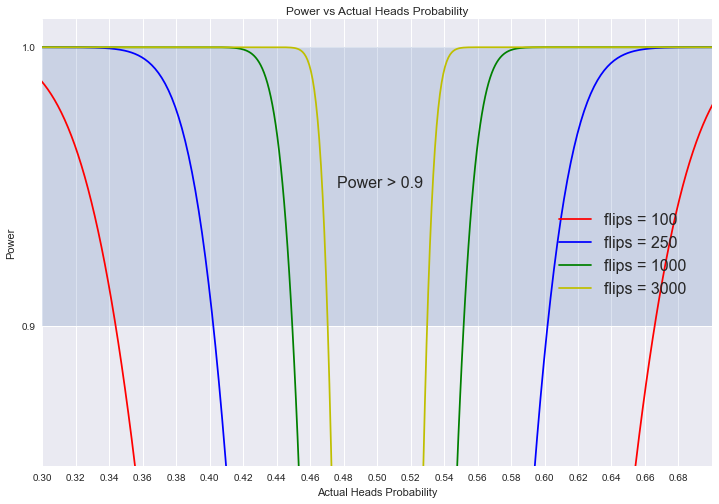

In [7]:
fig, ax = plt.subplots(1, 1)
plot_powers(ax)
ax.annotate('Power > 0.9', xy=(0.4758, 0.95), size=16)
ax.fill_between([0, 1.0], [0.9, 0.9], [1.0, 1.0], alpha=0.2)
ax.set_ybound((0.85, 1.01))
ax.set_xbound((0.3, 0.7))
ax.set_xticks(np.arange(0.30,0.70,0.02));

Recall that power is the probability that we can distinguish between a bias coin and a fair coin. By inspecting the above plot, we can make the following approximations:

- If we flip 100 coins, we get at least 0.9 power for a bias coin where $p<0.34$ or $p>0.66$.
- If we flip 250 coins, we get at least 0.9 power for a bias coin where $p<0.40$ or $p>0.60$.
- If we flip 1000 coins, we get at least 0.9 power for a bias coin where $p<0.45$ or $p>0.55$.
- If we flip 3000 coins, we get at least 0.9 power for a bias coin where $p<0.47$ or $p>0.53$.

**With 100 flips, we can only distinguish a very bias coin where $p<0.34$ or $p>0.66$ from a fair coin 90% of the time. With 10 times more flips (1000), we can distinguish a less bias coin where $p<0.45$ or $p>0.55$ from a fair coin 90% of the time.**

It is important that experiements have a large enough sample size so that there is enough statistical power to detect differences. If the sample size is too small, we can only detect a difference when there is a massive difference from the norm.